**1. Dataset Loading**

In [83]:
#importing the libraries
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import plotly.graph_objects as go
import seaborn as sns

In [84]:
apple_df = pd.read_csv('AAPL.csv')

In [85]:
apple_df.shape

(251, 7)

In [86]:
apple_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-15,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
1,2018-08-16,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2,2018-08-17,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
3,2018-08-20,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
4,2018-08-21,216.800003,217.190002,214.029999,215.039993,211.754028,26159800


**2. Data Pre-Processing**

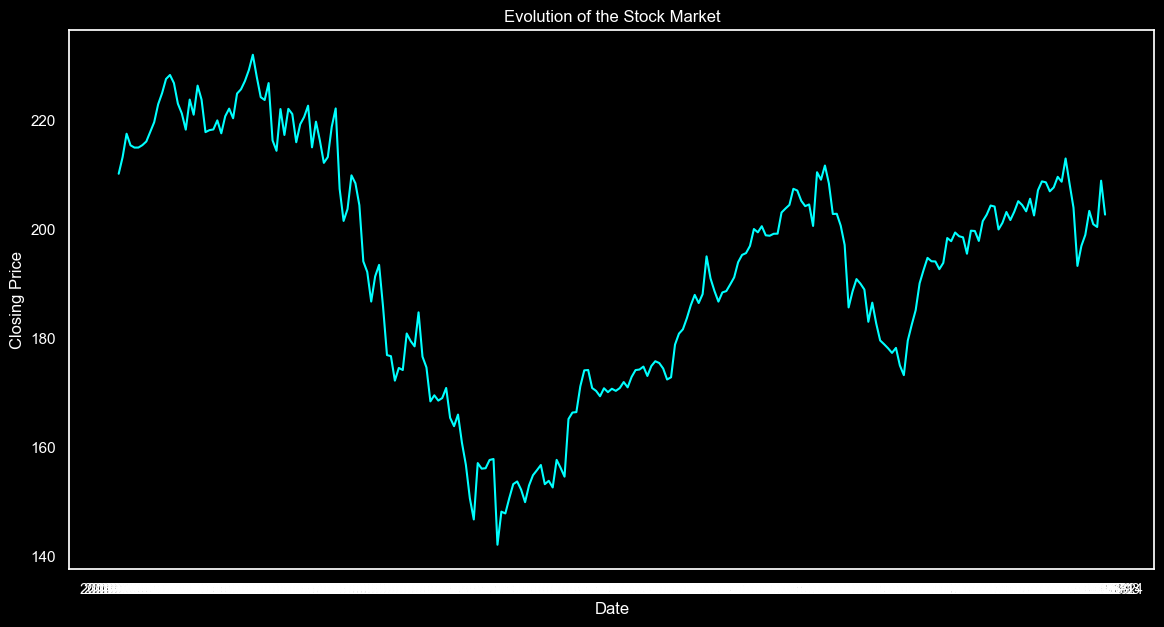

In [87]:
# Set the style
plt.style.use('dark_background')
sns.set(style='dark', rc={'axes.facecolor':'#000000', 'figure.facecolor':'#000000', 'axes.labelcolor':'white', 'xtick.color':'white', 'ytick.color':'white', 'text.color':'white', 'axes.edgecolor':'white'})

# Plot the evolution of the stock market
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Close', data=apple_df, color='cyan')
plt.title('Evolution of the Stock Market', color='white')
plt.xlabel('Date', color='white')
plt.ylabel('Closing Price', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

In [76]:
# Candlestick chart
fig = go.Figure(data=[
    go.Candlestick(
        x=apple_df['Date'],
        open=apple_df['Open'],
        high=apple_df['High'],
        low=apple_df['Low'],
        close=apple_df['Close'],
        name="Candlestick"
    )
])

# Add Volume as bar chart
fig.add_trace(
    go.Bar(
        x=apple_df['Date'],
        y=apple_df['Volume'],
        name='Volume',
        marker_color='blue',
        opacity=0.4,
        yaxis="y2"  # Secondary axis for volume
    )
)

# Update layout for dual-axis visualization
fig.update_layout(
    title="APPL Stock Volume",
    xaxis_title="Date",
    yaxis_title="Price",
    yaxis2=dict(
        title="Volume",
        overlaying="y",
        side="right",
    ),
    template="plotly_dark",
    xaxis_rangeslider_visible=False  # Hide range slider for cleaner visualization
)

# Show the chart
fig.show()

In [34]:
#checking for null values
apple_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [35]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [36]:
#converting the dataype of 'Date' col to 'datetime'
apple_df['Date'] = pd.to_datetime(apple_df['Date'])

In [37]:
#making the 'Date' col as index
apple_df.set_index('Date', inplace = True)

In [38]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-08-15 to 2019-08-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [39]:
#sort the indexes
apple_df.sort_index(inplace = True)

In [40]:
apple_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-15,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
2018-08-16,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2018-08-17,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
2018-08-20,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
2018-08-21,216.800003,217.190002,214.029999,215.039993,211.754028,26159800


In [77]:
# Apply log transformation to Volume to stabilize variance
apple_df['Log_Volume'] = np.log(apple_df['Volume'])

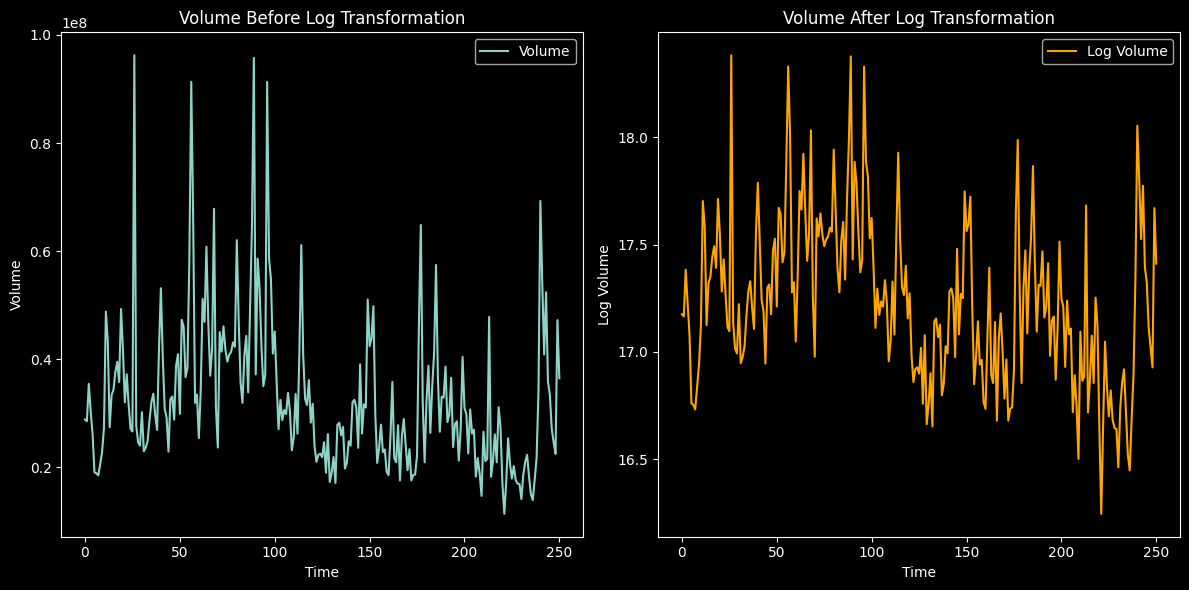

In [78]:
# Plot Volume before log transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(apple_df['Volume'], label='Volume')
plt.title('Volume Before Log Transformation')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()

# Plot Volume after log transformation
plt.subplot(1, 2, 2)
plt.plot(apple_df['Log_Volume'], label='Log Volume', color='orange')
plt.title('Volume After Log Transformation')
plt.xlabel('Time')
plt.ylabel('Log Volume')
plt.legend()

plt.tight_layout()
plt.show()

In [42]:
#deleting the original column of volume
apple_df.drop(columns = ['Volume'], inplace = True)

In [43]:
apple_df.head()

,Open,High,Low,Close,Adj Close,Log_Volume
Date,,,,,,
2018-08-15,209.220001,210.740005,208.330002,210.240005,207.027420,17.176150
2018-08-16,211.750000,213.809998,211.470001,213.320007,210.060333,17.165429
2018-08-17,213.440002,217.949997,213.160004,217.580002,214.255234,17.382985
2018-08-20,218.100006,219.179993,215.110001,215.460007,212.167633,17.226252
2018-08-21,216.800003,217.190002,214.029999,215.039993,211.754028,17.079734


In [44]:
#normalizing the data
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(apple_df[apple_df.columns])

In [45]:
scaled_values

array([[0.75161293, 0.74096871, 0.75563913, 0.7571206 , 0.75577275,
        0.43543352],
       [0.78076039, 0.77595438, 0.79141036, 0.79138853, 0.79023062,
        0.43041578],
       [0.80023046, 0.82313386, 0.81066308, 0.838785  , 0.83789019,
        0.53223737],
       ...,
       [0.64101379, 0.64193734, 0.65105941, 0.64853127, 0.68138544,
        0.31925107],
       [0.65714293, 0.75692305, 0.66621094, 0.7429906 , 0.77784302,
        0.66670621],
       [0.6817973 , 0.69196582, 0.69024831, 0.67378721, 0.70717566,
        0.54560053]])

In [46]:
#converting the array into dataframe
apple_scaled_df = pd.DataFrame(scaled_values, columns = apple_df.columns, index = apple_df.index)

In [47]:
apple_scaled_df.head()

,Open,High,Low,Close,Adj Close,Log_Volume
Date,,,,,,
2018-08-15,0.751613,0.740969,0.755639,0.757121,0.755773,0.435434
2018-08-16,0.780760,0.775954,0.791410,0.791389,0.790231,0.430416
2018-08-17,0.800230,0.823134,0.810663,0.838785,0.837890,0.532237
2018-08-20,0.853917,0.837151,0.832878,0.815198,0.814172,0.458883
2018-08-21,0.838940,0.814473,0.820574,0.810525,0.809473,0.390309


<Figure size 1200x800 with 0 Axes>

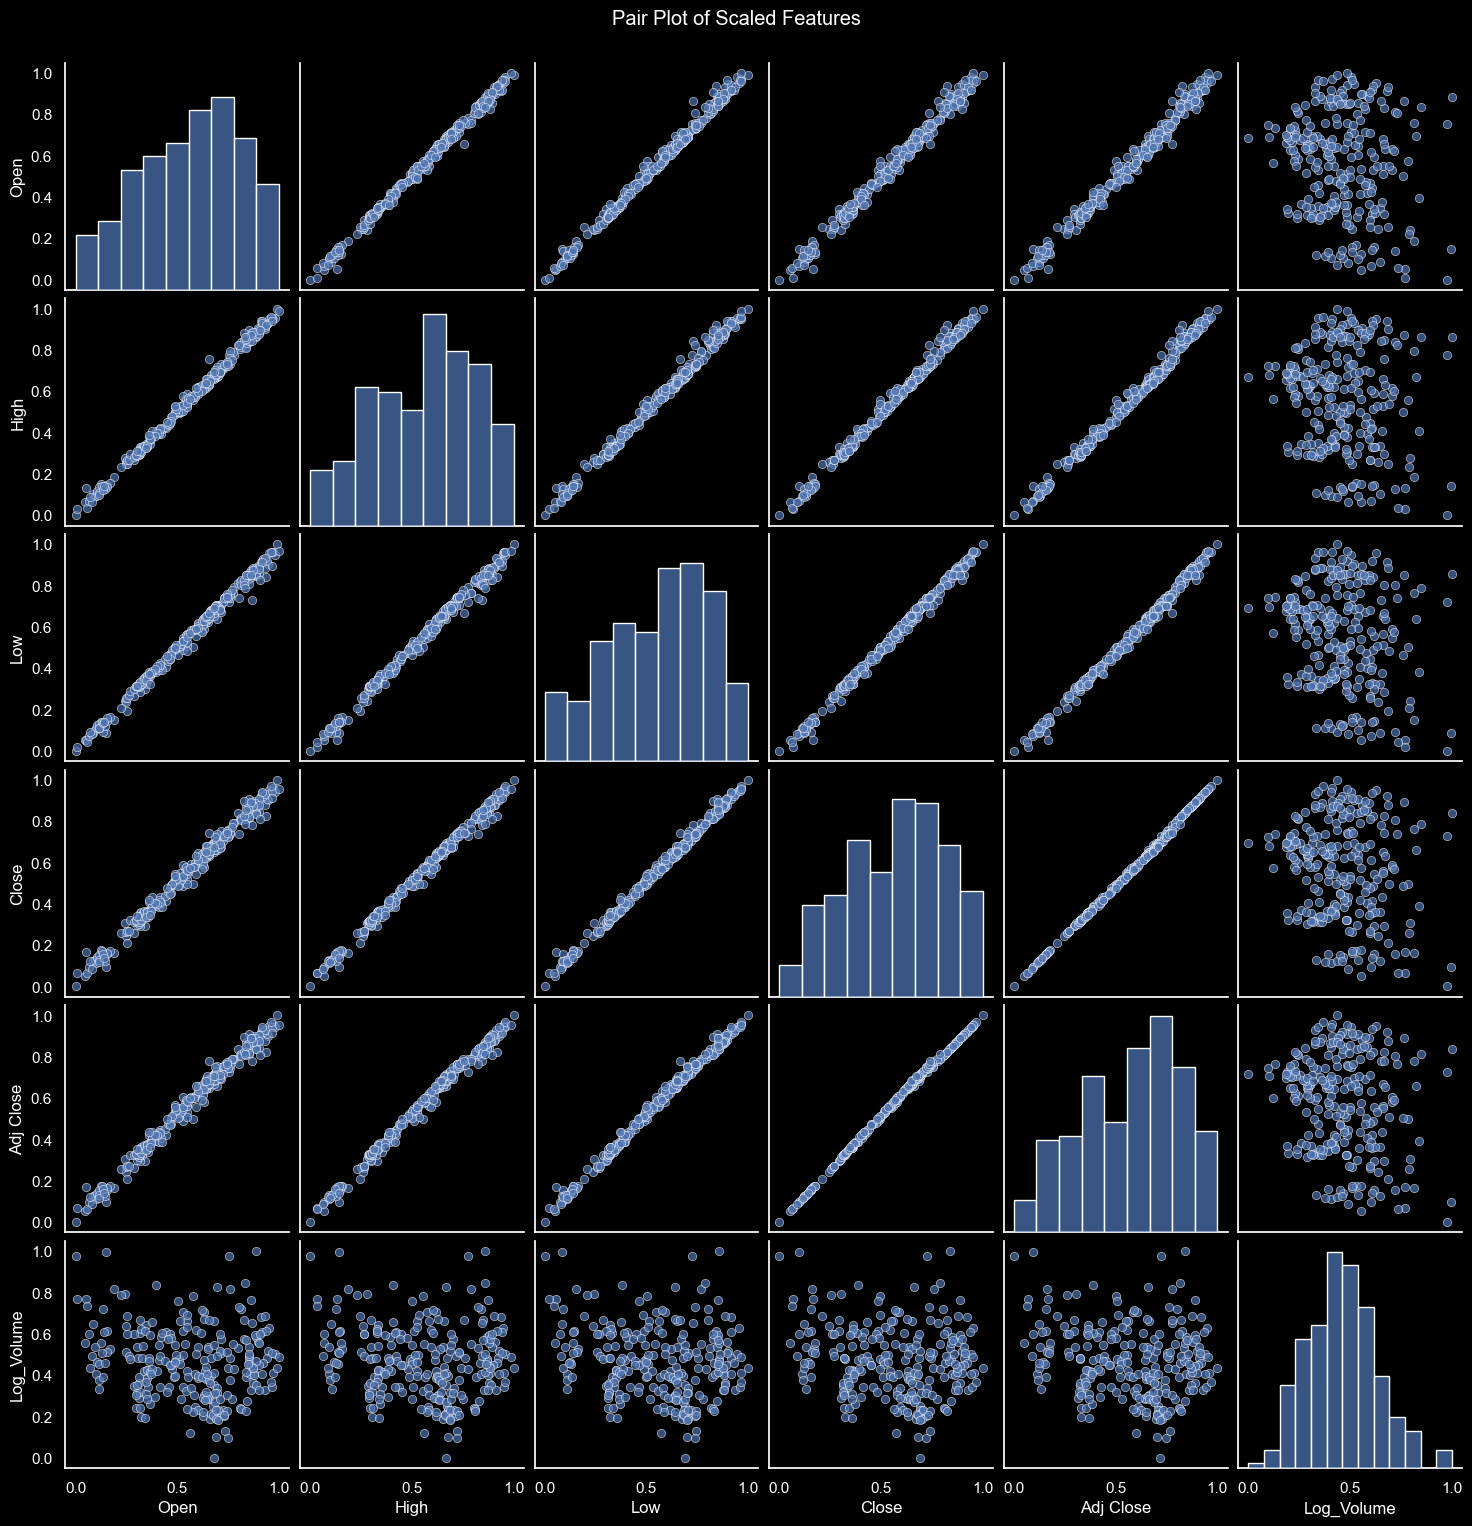

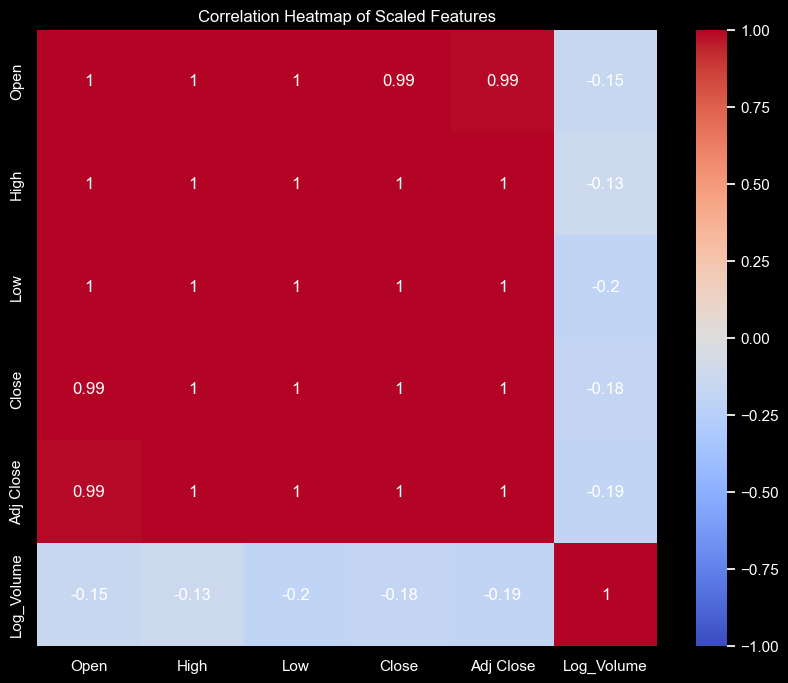

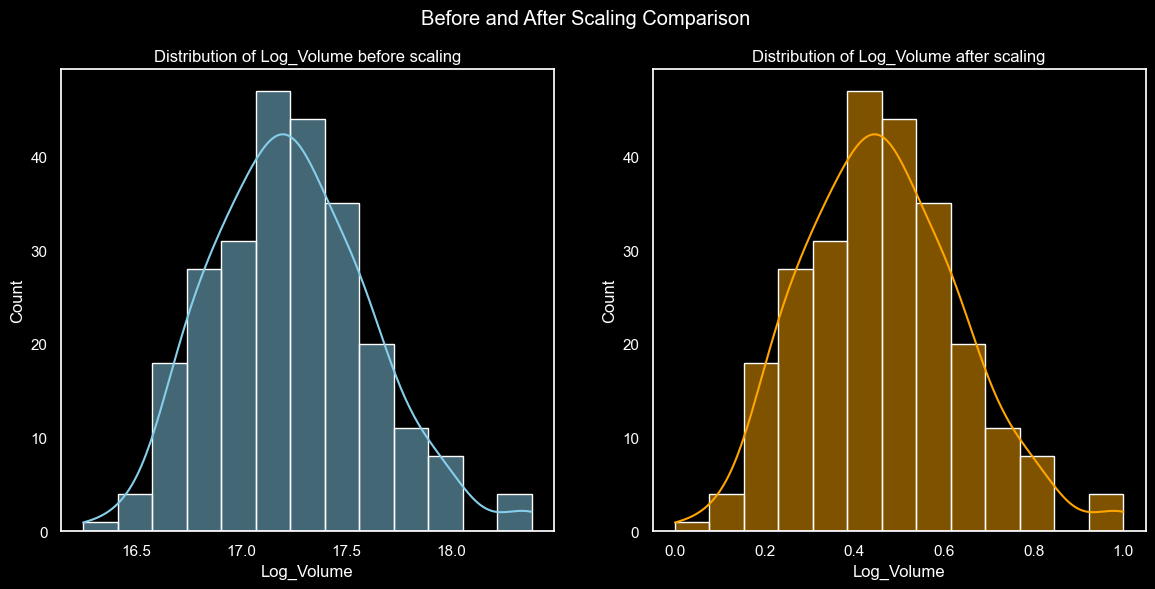

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a dark background style
plt.style.use('dark_background')
sns.set(style='dark', rc={'axes.facecolor':'#000000', 'figure.facecolor':'#000000', 'axes.labelcolor':'white', 'xtick.color':'white', 'ytick.color':'white', 'text.color':'white', 'axes.edgecolor':'white'})

# Pair plot to visualize relationships and distributions of scaled features
plt.figure(figsize=(12, 8))
sns.pairplot(apple_scaled_df, plot_kws={'alpha':0.7})
plt.suptitle('Pair Plot of Scaled Features', y=1.02, color='white')
plt.show()

# Correlation heatmap to visualize correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(apple_scaled_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={'color':'white'})
plt.title('Correlation Heatmap of Scaled Features', color='white')
plt.show()

# Before and after scaling comparison for a specific feature (e.g., Log_Volume)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(apple_df['Log_Volume'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Log_Volume before scaling', color='white')
axes[0].tick_params(colors='white')

sns.histplot(apple_scaled_df['Log_Volume'], kde=True, ax=axes[1], color='orange')
axes[1].set_title('Distribution of Log_Volume after scaling', color='white')
axes[1].tick_params(colors='white')

plt.suptitle('Before and After Scaling Comparison', color='white')
plt.show()

**3. Plotting the Columns**

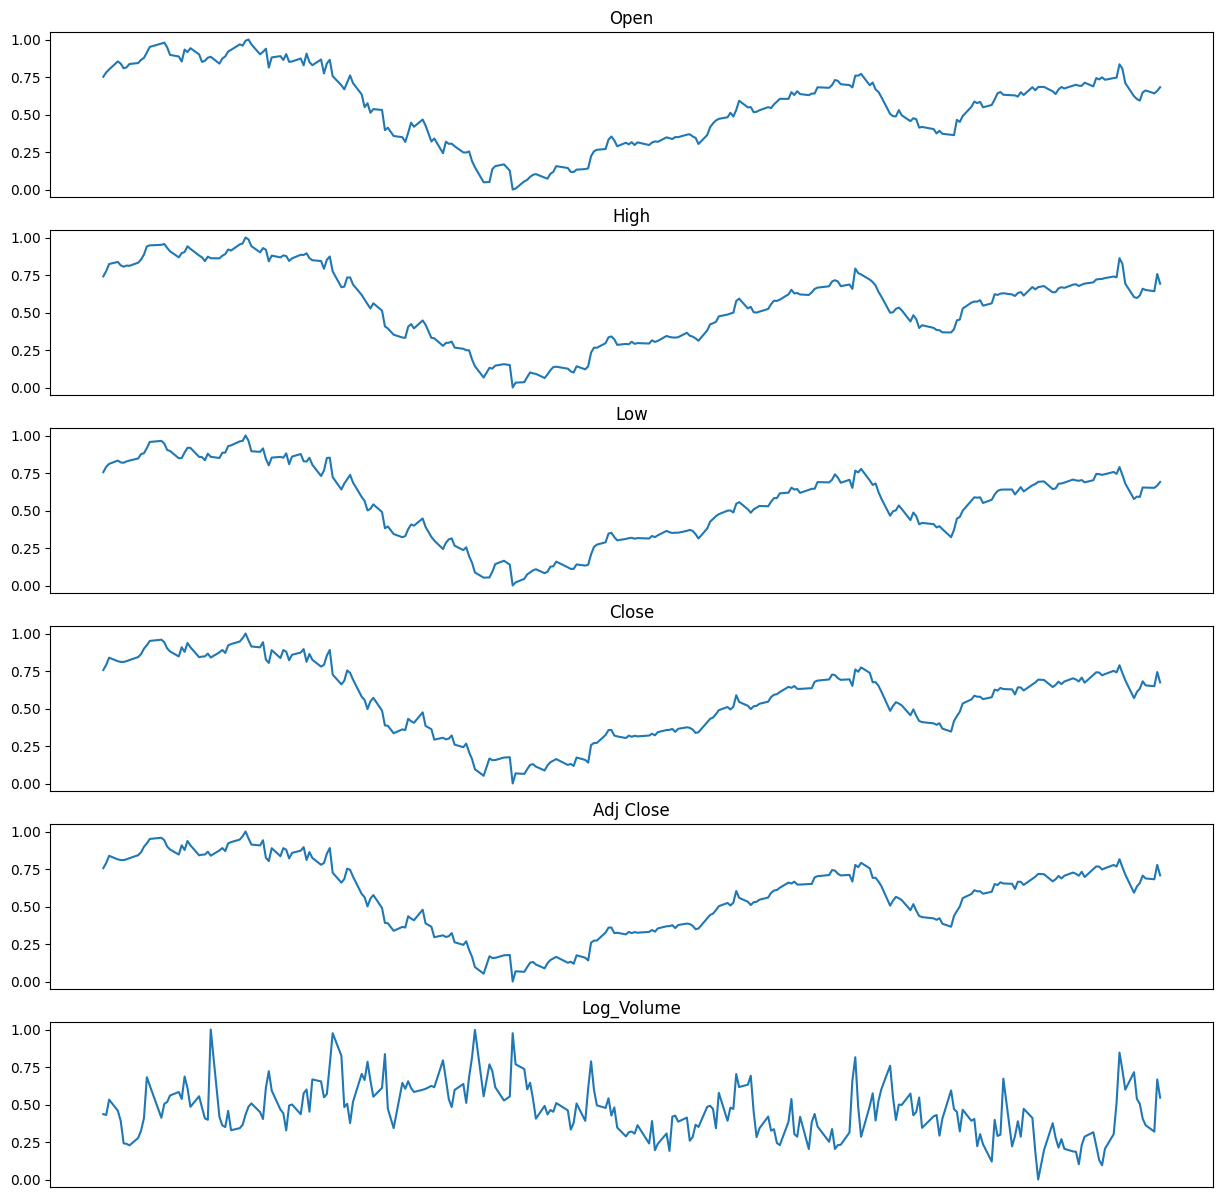

In [49]:
plt.rcParams['figure.figsize'] = (15, 15)
figure, axes = plt.subplots(6)

for ax, col in zip(axes, apple_scaled_df.columns):
  ax.plot(apple_scaled_df[col])
  ax.set_title(col)
  ax.axes.xaxis.set_visible(False)

In [52]:
# Assuming apple_scaled_df is your scaled DataFrame
apple_scaled_df.to_csv('apple_scaled_data.csv', index=False)

**4. Create the Sliding Window Sequences**

In [53]:
window_size = 60

def create_sequence(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        X.append(data.iloc[i-window_size:i].values)
        y.append(data.iloc[i].values)
    return np.array(X), np.array(y)

X, y = create_sequence(apple_scaled_df, window_size)

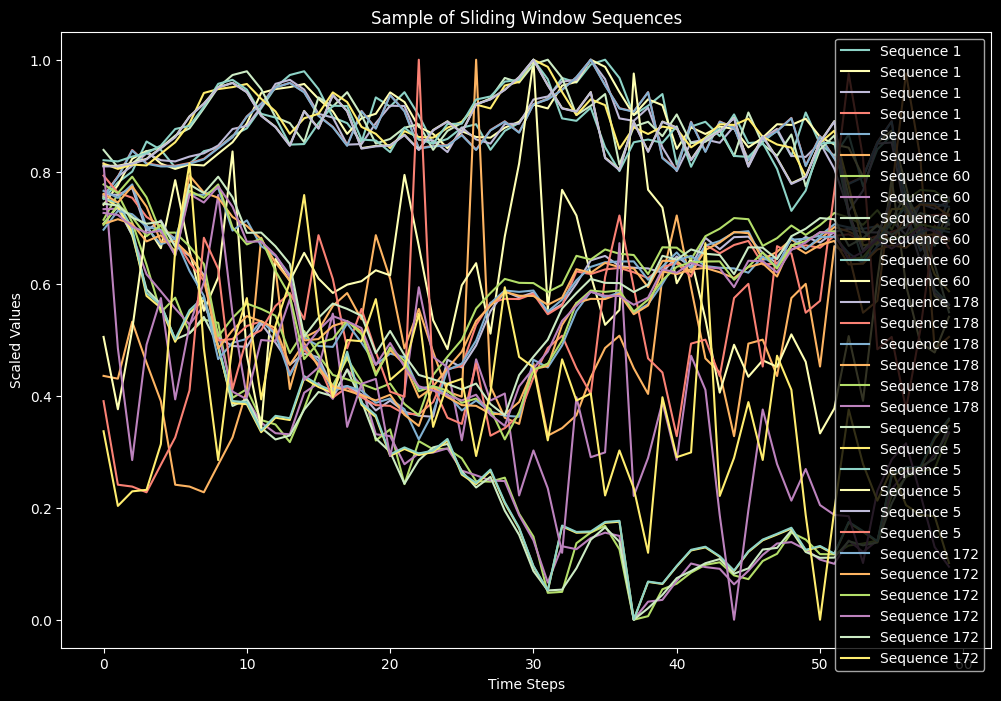

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Plot a sample of sliding window sequences
num_sequences_to_plot = 5
sample_indices = np.random.choice(len(X), num_sequences_to_plot, replace=False)

plt.style.use('dark_background')
plt.figure(figsize=(12, 8))

for i, idx in enumerate(sample_indices):
    plt.plot(X[idx], label=f'Sequence {idx+1}')

plt.title('Sample of Sliding Window Sequences')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Values')
plt.legend()
plt.show()

In [54]:
X.shape, y.shape

((191, 60, 6), (191, 6))

In [55]:
#train-test-split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((152, 60, 6), (152, 6), (39, 60, 6), (39, 6))

In [56]:
X_train.shape[1], X_train.shape[2], y_train.shape[1]

(60, 6, 6)

**5.  Building the LSTM model**

In [ ]:
model = keras.Sequential([
    # Adding the first LSTM layer with Dropout
    keras.layers.LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])),
    keras.layers.Dropout(0.3),

    # Adding the second LSTM layer with Dropout
    keras.layers.LSTM(units = 50, return_sequences=True),
    keras.layers.Dropout(0.3),

    # Adding the third LSTM layer with Dropout
    keras.layers.LSTM(units = 50, return_sequences=False),
    keras.layers.Dropout(0.3),

    # Adding a Dense output layer
    keras.layers.Dense(y_train.shape[1])
])

In [58]:
#compilation
model.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
              metrics = ['RootMeanSquaredError'])

In [59]:
#Early stopping condition
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

In [60]:
history = model.fit(X_train, y_train,
                    validation_split = 0.2,
                    epochs=100,
                    batch_size=3,
                    callbacks=[early_stopping])

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - RootMeanSquaredError: 0.3330 - loss: 0.1164 - val_RootMeanSquaredError: 0.2049 - val_loss: 0.0420
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - RootMeanSquaredError: 0.2064 - loss: 0.0436 - val_RootMeanSquaredError: 0.1525 - val_loss: 0.0232
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - RootMeanSquaredError: 0.1604 - loss: 0.0258 - val_RootMeanSquaredError: 0.1151 - val_loss: 0.0133
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - RootMeanSquaredError: 0.1553 - loss: 0.0243 - val_RootMeanSquaredError: 0.1035 - val_loss: 0.0107
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - RootMeanSquaredError: 0.1280 - loss: 0.0164 - val_RootMeanSquaredError: 0.1649 - val_loss: 0.0272
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - RootMeanSquaredError: 0.1375 - loss: 0.0189 - val_RootMeanSquaredError: 0.1256 - val_loss: 0.0158
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - RootMeanSquaredError: 0.1303 - los

In [61]:
# Making predictions on the test data
predictions = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 368ms/step


In [62]:
# Inverse scaling to get the original values
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

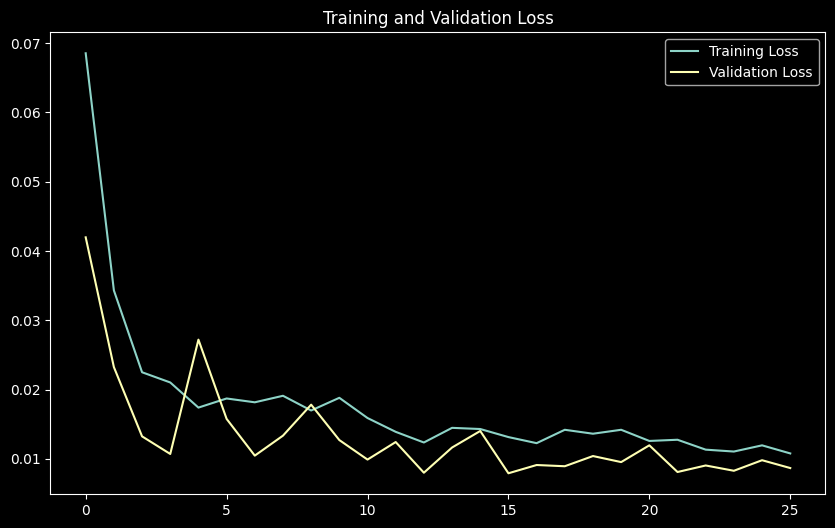

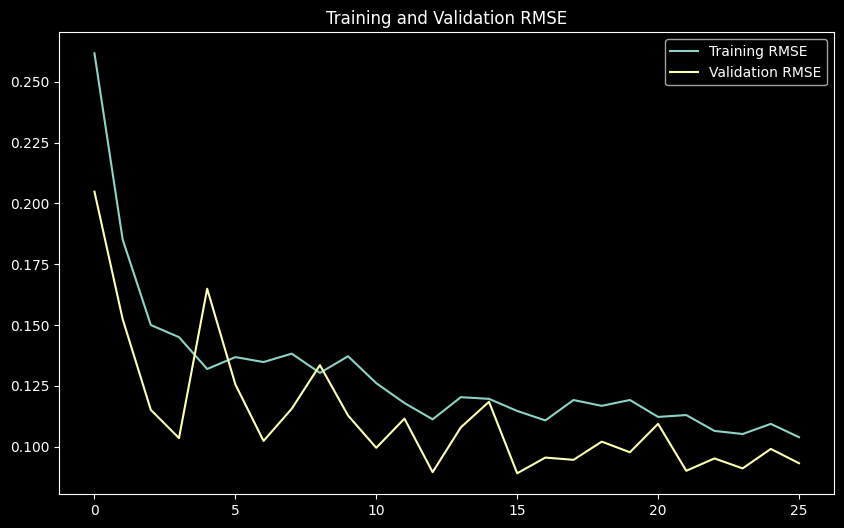

In [71]:
import matplotlib.pyplot as plt

# Use a dark background style
plt.style.use('dark_background')

# Set figure size
fig_size = (10, 6)

# Plot Loss
plt.figure(figsize=fig_size)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot RMSE
plt.figure(figsize=fig_size)
plt.plot(history.history['RootMeanSquaredError'], label='Training RMSE')
plt.plot(history.history['val_RootMeanSquaredError'], label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.legend()
plt.show()

In [65]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create a subplot with 2 rows and 3 columns
fig = make_subplots(rows=2, cols=3, subplot_titles=apple_scaled_df.columns)

# Plot each column
for i, col in enumerate(apple_scaled_df.columns):
    row = i // 3 + 1
    col_num = i % 3 + 1
    
    fig.add_trace(go.Scatter(
        y=y_test_rescaled[:, i],
        mode='lines',
        name=f'Actual {col}',
        line=dict(color='blue')
    ), row=row, col=col_num)
    
    fig.add_trace(go.Scatter(
        y=predictions[:, i],
        mode='lines',
        name=f'Predicted {col}',
        line=dict(color='red')
    ), row=row, col=col_num)
    
    fig.update_xaxes(title_text='Time', row=row, col=col_num)
    fig.update_yaxes(title_text=f'{col} Price', row=row, col=col_num)

# Update layout
fig.update_layout(
    title='Price Prediction',
    height=800,
    showlegend=True,
    template='plotly_dark'  # Set the template to dark mode
)

# Show plot
fig.show()